# This notebook contains examples of how to use the feat plotting functions

 Included in the toolbox are two models trained on the CK+ dataset for use with the plotting functions. The 'blue' model was created by using openface landmarks to align each face in the dataset to a neutral face with numpy's least squares function. Then the PLS model was trained using OpenFace Action Unit vectors along with the pitch, yaw and roll of each face to predict transformed landmark data. The 'facet' model was trained using the same procedure, but with AU vectors from Facet instead of OpenFace.

Draw a standard neutral face

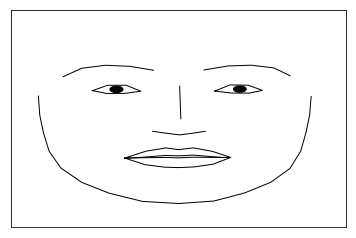

In [2]:
# Load modules
import feat.plotting as plot
import numpy as np
import matplotlib.pyplot as plt

# Plot face
fig, ax = plt.subplots()
plot.plot_face(ax = ax)
plt.show()

# Draw lineface using input vector

Affectiva vectors should be divided by twenty for use with our 'blue' model. 

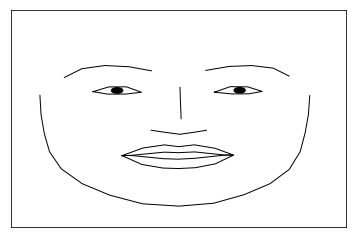

In [3]:
# Load modules
import feat.plotting as plot
import numpy as np
import matplotlib.pyplot as plt

# Add data
au = [0.127416, 0.809139, 0, 0.343189, 0.689964, 1.23862, 1.28464, 0.79003, 0.842145, 0.111669, 
      0.450328, 1.02961, 0.871225, 0, 1.1977,  0.457218, 0, 0, 0, 0]


# Plot face
fig, ax = plt.subplots()
plot.plot_face(model=None, ax = ax, au = np.array(au), color='k', linewidth=1, linestyle='-')
plt.show()



# Draw using Facet model

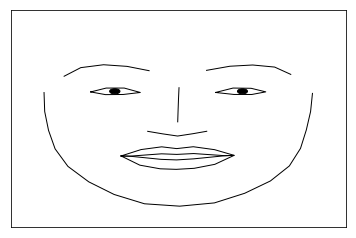

In [4]:
# Load modules
import feat.plotting as plot
import feat.utils as utils
import numpy as np
import matplotlib.pyplot as plt

# Add data
au = [0.127416, 0.809139, 0, 0.343189, 0.689964, 1.23862, 1.28464, 0.79003, 0.842145, 0.111669, 
      0.450328, 1.02961, 0.871225, 0, 1.1977,  0.457218, 0, 0, 0, 0]


# Load a model 
model = utils.load_h5('facet.h5')

# Plot face
fig, ax = plt.subplots()
plot.plot_face(model=model, ax = ax, au = np.array(au), color='k', linewidth=1, linestyle='-')
plt.show()



# Add a vectorfield

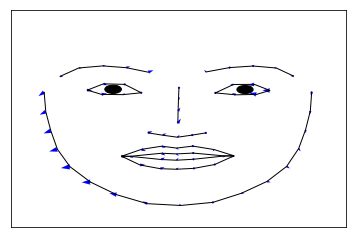

In [5]:
# Load modules
import feat.plotting as plot
import feat.utils as utils
import numpy as np
import matplotlib.pyplot as plt

# Add data
au = [0.127416, 0.809139, 0, 5, 0.689964, 1.23862, 1.28464, 0.79003, 0.842145, 0.111669, 
      0.450328, 1.02961, 0.871225, 0, 1.1977,  0.457218, 0, 0, 0, 0]

# Get neutral landmarks
neutral = plot.predict(np.zeros(20))

# Provide target landmarks and other vector specifications
vectors = {'target': neutral, 'color': 'blue'}


# Plot face
fig, ax = plt.subplots()
plot.plot_face(model=model, ax = ax, au = np.array(au), vectorfield = vectors, color='k', linewidth=1, linestyle='-')
plt.show()

# Add some muscles

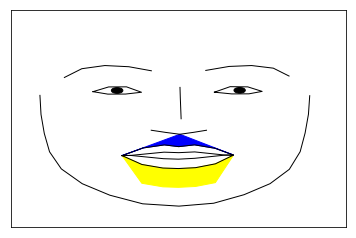

In [6]:
# Load modules
import feat.plotting as plot
import feat.utils as utils
import numpy as np
import matplotlib.pyplot as plt

# Add data
au = [0.127416, 0.809139, 0, 0.343189, 0.689964, 1.23862, 1.28464, 0.79003, 0.842145, 0.111669, 
      0.450328, 1.02961, 0.871225, 0, 1.1977,  0.457218, 0, 0, 0, 0]

# Add some muscles
muscles = {'orb_oris_l': 'yellow', 'orb_oris_u': "blue"}

# Plot face
fig, ax = plt.subplots()
plot.plot_face(model=None, ax = ax, au = np.array(au), muscles = muscles, color='k', linewidth=1, linestyle='-')
plt.show()

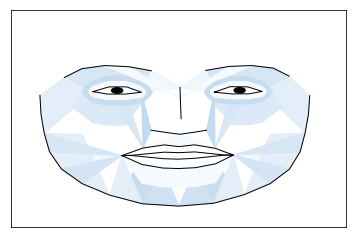

In [7]:
# Load modules
import feat.plotting as plot
import feat.utils as utils
import numpy as np
import matplotlib.pyplot as plt

# Add data
au = [0.127416, 0.809139, 0, 0.343189, 0.689964, 1.23862, 1.28464, 0.79003, 0.842145, 0.111669, 
      0.450328, 1.02961, 0.871225, 0, 1.1977,  0.457218, 0, 0, 0, 0]

# Add some muscles
muscles = {'all': 'heatmap'}

# Plot face
fig, ax = plt.subplots()
plot.plot_face(model=None, ax = ax, au = np.array(au), muscles = muscles, color='k', linewidth=1, linestyle='-')
plt.show()



# Make sure muscle array contains 'facet' for a facet heatmap

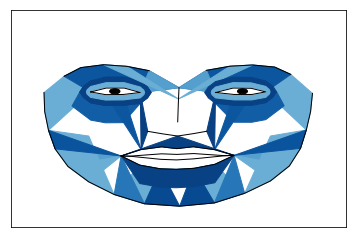

In [8]:
# Load modules
import feat.plotting as plot
import feat.utils as utils
import numpy as np
import matplotlib.pyplot as plt

# Add data
au = [0.127416, 0.809139, 0, 0.343189, 0.689964, 1.23862, 1.28464, 0.79003, 0.842145, 0.111669, 
      0.450328, 1.02961, 0.871225, 0, 1.1977,  0.457218, 0, 0, 0, 0]


# Load a model 
model = utils.load_h5('facet.h5')

# Add muscles
muscles = {'all': 'heatmap', 'facet': 1}

# Plot face
fig, ax = plt.subplots()
plot.plot_face(model=model, ax = ax, au = np.array(au), muscles = muscles, color='k', linewidth=1, linestyle='-')
plt.show()



# Add gaze vectors

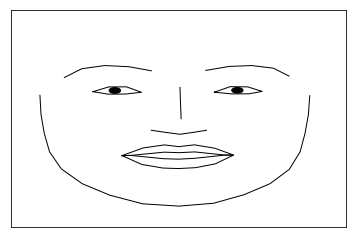

In [9]:
# Load modules
import feat.plotting as plot
import feat.utils as utils
import numpy as np
import matplotlib.pyplot as plt

# Add data
au = [0.127416, 0.809139, 0, 0.343189, 0.689964, 1.23862, 1.28464, 0.79003, 0.842145, 0.111669, 
      0.450328, 1.02961, 0.871225, 0, 1.1977,  0.457218, 0, 0, 0, 0]

# Add some muscles
gaze = [-1,0,-1,0]

# Plot face
fig, ax = plt.subplots()
plot.plot_face(model=None, ax = ax, au = np.array(au), gaze = gaze, color='k', linewidth=1, linestyle='-')
plt.show()



# Call plot method on Fex instances

OpenFace

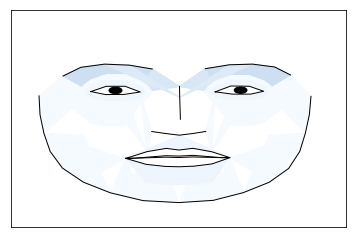

In [10]:
import feat.plotting as plot
from feat.utils import  load_pickled_model, load_h5, get_resource_path
from feat.tests.utils import get_test_data_path
import numpy as np
import matplotlib.pyplot as plt
from feat.data import *
from os.path import join

fig, ax = plt.subplots()

dat = Fex(read_openface(join(get_test_data_path(), 'OpenFace_Test.csv')), sampling_freq=30)
openface = Openface(dat)
openface.plot(12, ax=ax, muscles={'all': "heatmap"}, gaze = True)

plt.show()

Facet

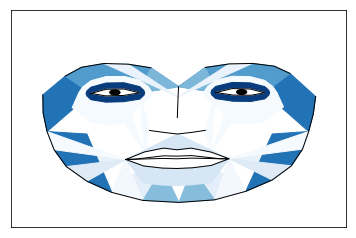

In [11]:

from feat.tests.utils import get_test_data_path
import matplotlib.pyplot as plt
from feat.data import *
from os.path import join

fig, ax = plt.subplots()

dat = Fex(read_facet(join(get_test_data_path(), 'iMotions_Test_v2.txt')), sampling_freq=30)
facet = Facet(dat)
facet.plot(8, ax=ax, muscles={'all': "heatmap"})

plt.show()

Affdex

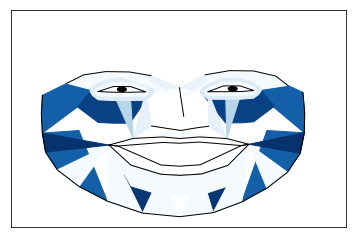

In [12]:

import feat.plotting as plot
from feat.utils import  load_pickled_model, load_h5, get_resource_path
from feat.tests.utils import get_test_data_path
import numpy as np
import matplotlib.pyplot as plt
from feat.data import *
from os.path import join

fig, ax = plt.subplots()

dat = Fex(read_affectiva(join(get_test_data_path(), 'sample_affectiva-api-app_output.json')), sampling_freq=30)
openface = Affdex(dat)
openface.plot(0, ax=ax, muscles={'all': "heatmap"})

plt.show()